In [20]:
import pandas as pd
import numpy as np
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import joblib
import tensorflow as tf

In [2]:
dataset = pd.read_csv("C:/Users/yunoa/SW/dataset/data_강남구.csv", encoding="utf-8")
dataset.set_index('time', inplace=True)
dataset.index.name = 'date'
dataset

,PM10,SO2,CO,O3,NO2,temp,deg_sin,deg_cos,spd,rain,humi
date,,,,,,,,,,,
2010-01-01 1:00,30,0.005,0.4,0.011,0.027,-10.1,0.146083,0.989272,1.3,0.0,64.4
2010-01-01 2:00,35,0.005,0.5,0.006,0.034,-9.8,0.648120,0.761538,0.8,0.0,38.5
2010-01-01 3:00,36,0.005,0.5,0.008,0.030,-10.7,0.928486,0.371368,1.9,0.0,49.0
2010-01-01 4:00,31,0.005,0.5,0.008,0.030,-11.1,0.873772,0.486335,0.7,0.0,54.2
2010-01-01 5:00,33,0.005,0.4,0.009,0.027,-11.1,0.887815,0.460200,1.9,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 20:00,23,0.004,0.5,0.013,0.030,-5.4,-0.004847,-0.016767,1.6,0.0,48.9
2020-12-31 21:00,16,0.004,0.5,0.014,0.027,-5.6,-0.017272,0.002509,1.5,0.0,51.9
2020-12-31 22:00,32,0.004,0.5,0.018,0.022,-5.8,0.014219,-0.010121,2.1,0.0,54.5


In [3]:
dataset = dataset[24:]
dataset

,PM10,SO2,CO,O3,NO2,temp,deg_sin,deg_cos,spd,rain,humi
date,,,,,,,,,,,
2010-01-02 1:00,39,0.007,0.4,0.009,0.028,-3.2,0.277315,-0.960779,0.5,0.0,53.2
2010-01-02 2:00,37,0.006,0.4,0.010,0.025,-3.2,0.944376,0.328867,2.3,0.0,37.0
2010-01-02 3:00,38,0.006,0.4,0.013,0.021,-3.2,0.950516,0.310676,0.6,0.0,61.8
2010-01-02 4:00,40,0.005,0.4,0.013,0.021,-3.6,0.838671,-0.544639,0.8,0.0,40.9
2010-01-02 5:00,43,0.005,0.4,0.013,0.021,-3.3,0.907777,0.419452,1.0,0.0,62.9
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 20:00,23,0.004,0.5,0.013,0.030,-5.4,-0.004847,-0.016767,1.6,0.0,48.9
2020-12-31 21:00,16,0.004,0.5,0.014,0.027,-5.6,-0.017272,0.002509,1.5,0.0,51.9
2020-12-31 22:00,32,0.004,0.5,0.018,0.022,-5.8,0.014219,-0.010121,2.1,0.0,54.5


In [4]:
values = dataset.values
dataset

,PM10,SO2,CO,O3,NO2,temp,deg_sin,deg_cos,spd,rain,humi
date,,,,,,,,,,,
2010-01-02 1:00,39,0.007,0.4,0.009,0.028,-3.2,0.277315,-0.960779,0.5,0.0,53.2
2010-01-02 2:00,37,0.006,0.4,0.010,0.025,-3.2,0.944376,0.328867,2.3,0.0,37.0
2010-01-02 3:00,38,0.006,0.4,0.013,0.021,-3.2,0.950516,0.310676,0.6,0.0,61.8
2010-01-02 4:00,40,0.005,0.4,0.013,0.021,-3.6,0.838671,-0.544639,0.8,0.0,40.9
2010-01-02 5:00,43,0.005,0.4,0.013,0.021,-3.3,0.907777,0.419452,1.0,0.0,62.9
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 20:00,23,0.004,0.5,0.013,0.030,-5.4,-0.004847,-0.016767,1.6,0.0,48.9
2020-12-31 21:00,16,0.004,0.5,0.014,0.027,-5.6,-0.017272,0.002509,1.5,0.0,51.9
2020-12-31 22:00,32,0.004,0.5,0.018,0.022,-5.8,0.014219,-0.010121,2.1,0.0,54.5


In [5]:
values

array([[3.90e+01, 7.00e-03, 4.00e-01, ..., 5.00e-01, 0.00e+00, 5.32e+01],
       [3.70e+01, 6.00e-03, 4.00e-01, ..., 2.30e+00, 0.00e+00, 3.70e+01],
       [3.80e+01, 6.00e-03, 4.00e-01, ..., 6.00e-01, 0.00e+00, 6.18e+01],
       ...,
       [3.20e+01, 4.00e-03, 5.00e-01, ..., 2.10e+00, 0.00e+00, 5.45e+01],
       [3.20e+01, 4.00e-03, 5.00e-01, ..., 1.90e+00, 0.00e+00, 5.42e+01],
       [2.20e+01, 4.00e-03, 4.00e-01, ..., 2.40e+00, 0.00e+00, 5.45e+01]])

In [6]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values) #값을 0~1로 떨어뜨린다
values

array([[3.90e+01, 7.00e-03, 4.00e-01, ..., 5.00e-01, 0.00e+00, 5.32e+01],
       [3.70e+01, 6.00e-03, 4.00e-01, ..., 2.30e+00, 0.00e+00, 3.70e+01],
       [3.80e+01, 6.00e-03, 4.00e-01, ..., 6.00e-01, 0.00e+00, 6.18e+01],
       ...,
       [3.20e+01, 4.00e-03, 5.00e-01, ..., 2.10e+00, 0.00e+00, 5.45e+01],
       [3.20e+01, 4.00e-03, 5.00e-01, ..., 1.90e+00, 0.00e+00, 5.42e+01],
       [2.20e+01, 4.00e-03, 4.00e-01, ..., 2.40e+00, 0.00e+00, 5.45e+01]])

In [24]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [25]:
reframed = series_to_supervised(scaled, 1, 1) #t-1시점,t시점 데이터를 한 행으로 둔다
reframed.drop(reframed.columns[[12, 13, 14, 15, 16, 17, 18, 19, 20, 21]], axis=1, inplace=True)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var1(t)
1,0.029457,0.153846,0.107143,0.058065,0.198529,0.242424,0.638657,0.019610,0.052083,0.0,0.525355,0.027907
2,0.027907,0.128205,0.107143,0.064516,0.176471,0.242424,0.972188,0.664433,0.239583,0.0,0.361055,0.028682
3,0.028682,0.128205,0.107143,0.083871,0.147059,0.242424,0.975258,0.655338,0.062500,0.0,0.612576,0.030233
4,0.030233,0.102564,0.107143,0.083871,0.147059,0.235294,0.919335,0.227680,0.083333,0.0,0.400609,0.032558
5,0.032558,0.102564,0.107143,0.083871,0.147059,0.240642,0.953889,0.709726,0.104167,0.0,0.623732,0.029457
...,...,...,...,...,...,...,...,...,...,...,...,...
96403,0.022481,0.076923,0.142857,0.070968,0.227941,0.208556,0.507973,0.496453,0.187500,0.0,0.496957,0.017054
96404,0.017054,0.076923,0.142857,0.083871,0.213235,0.203209,0.497576,0.491617,0.166667,0.0,0.481744,0.011628
96405,0.011628,0.076923,0.142857,0.090323,0.191176,0.199643,0.491364,0.501255,0.156250,0.0,0.512170,0.024031
96406,0.024031,0.076923,0.142857,0.116129,0.154412,0.196078,0.507109,0.494939,0.218750,0.0,0.538540,0.024031


In [26]:
values = reframed.values
n_train_hours = 365 * 24 * 8 #8년치 데이터만 가져온다
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [27]:
test_X

array([[[0.07674419, 0.1025641 , 0.25      , ..., 0.19791667,
         0.        , 0.46146045]],

       [[0.07209302, 0.1025641 , 0.25      , ..., 0.25      ,
         0.        , 0.44219067]],

       [[0.05658915, 0.12820513, 0.21428571, ..., 0.25      ,
         0.        , 0.39858012]],

       ...,

       [[0.01162791, 0.07692308, 0.14285714, ..., 0.15625   ,
         0.        , 0.51217039]],

       [[0.02403101, 0.07692308, 0.14285714, ..., 0.21875   ,
         0.        , 0.53853955]],

       [[0.02403101, 0.07692308, 0.14285714, ..., 0.19791667,
         0.        , 0.53549696]]])

In [28]:
test_y

array([0.07209302, 0.05658915, 0.05581395, ..., 0.02403101, 0.02403101,
       0.01627907])

In [29]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(metrics = ["Accuracy"], loss='mae', optimizer='adam')

In [30]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, 
        validation_data=(test_X, test_y), verbose=2, shuffle=False, validation_split=0.10)

Epoch 1/50
876/876 - 5s - loss: 0.0102 - Accuracy: 8.0860e-04 - val_loss: 0.0096 - val_Accuracy: 5.7078e-04
Epoch 2/50
876/876 - 2s - loss: 0.0062 - Accuracy: 8.0860e-04 - val_loss: 0.0054 - val_Accuracy: 5.7078e-04
Epoch 3/50
876/876 - 2s - loss: 0.0054 - Accuracy: 8.2445e-04 - val_loss: 0.0055 - val_Accuracy: 5.7078e-04
Epoch 4/50
876/876 - 2s - loss: 0.0055 - Accuracy: 8.2445e-04 - val_loss: 0.0055 - val_Accuracy: 5.7078e-04
Epoch 5/50
876/876 - 2s - loss: 0.0054 - Accuracy: 8.2445e-04 - val_loss: 0.0055 - val_Accuracy: 5.7078e-04
Epoch 6/50
876/876 - 2s - loss: 0.0054 - Accuracy: 8.2445e-04 - val_loss: 0.0056 - val_Accuracy: 5.7078e-04
Epoch 7/50
876/876 - 2s - loss: 0.0055 - Accuracy: 8.2445e-04 - val_loss: 0.0056 - val_Accuracy: 5.7078e-04
Epoch 8/50
876/876 - 2s - loss: 0.0055 - Accuracy: 8.2445e-04 - val_loss: 0.0055 - val_Accuracy: 5.7078e-04
Epoch 9/50
876/876 - 2s - loss: 0.0054 - Accuracy: 8.2445e-04 - val_loss: 0.0053 - val_Accuracy: 5.7078e-04
Epoch 10/50
876/876 - 2s - l

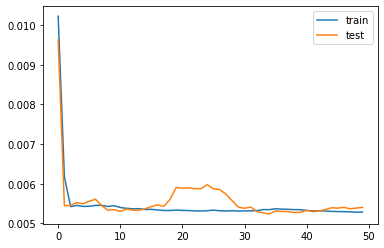

In [31]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

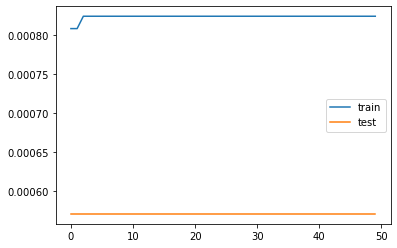

In [32]:
pyplot.plot(history.history['Accuracy'], label='train')
pyplot.plot(history.history['val_Accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [15]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))

In [16]:
rmse

10.860948469203153

In [22]:
tf.keras.models.save_model(model, "C:/Users/yunoa/SW/predict_model/model_강남구.h5")